In [191]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from ipywidgets import Layout, Button, Box
import ipywidgets as widgets


import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns

sns.set(style="whitegrid")

In [192]:
artifacts_dir = "/home/sk/sandmark/notebooks/nightly/sandmark-nightly/"

In [193]:
bench_files = []

artifacts_path = artifacts_dir.split("/sandmark-nightly/sequential")[0]
# print(artifacts_path)

for root, dirs, files in os.walk(artifacts_dir):
#     print(dirs)
    for file in files:
#         print(file)
        if file.endswith("_1.orun.summary.bench"):
            # print(root)
            f = root.split("/sequential/")
#             print(f)
            bench_files.append((os.path.join(root, file)))

# print(bench_files)

In [194]:
len(bench_files)
for b in bench_files :
    print(b + '\n')

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210521_160001/4.12.0+domains+effects_1.orun.summary.bench

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210521_160001/4.12.0+stock_1.orun.summary.bench



In [195]:
benches = dict()
for x in bench_files:
    l = x.split("/sequential/")[1]
#     print(l)
    d = l.split("/")
#     print(d)
#     commit     = d[0]
    timestamp  = d[0]
    variant    = d[1]
    value      = timestamp + " " + variant
    if timestamp in benches.keys():
        benches[timestamp].append(value)
    else:
        benches[timestamp]=[value]

In [196]:
benches

{'20210521_160001': ['20210521_160001 4.12.0+domains+effects_1.orun.summary.bench',
  '20210521_160001 4.12.0+stock_1.orun.summary.bench']}

In [197]:
def f(x): return x

def disp(benches):    
    def select_timestamp(timestamp):
        variantW.options = benches[timestamp]

    def select_variant(variant):
        return None
    
    timestampW = widgets.Dropdown(options=benches.keys(), description='Timestamp', disabled=False)
    timestampS = timestampW.value
    timestampD = widgets.interactive(select_timestamp, timestamp=timestampW)

    variantW = widgets.Dropdown(options=benches[timestampS], description='Variant', disabled=False)
    varinatS = variantW.value
    variantD = widgets.interactive(select_variant, variant=variantW)

    items_layout = Layout( width='auto' )
    
    box_layout = Layout(display='flex',
                       flex_flow='row wrap',
                       align_items='flex-start',
                       #border='solid',
                       width='100%')
    
    items = [timestampD, variantD]
    box = Box(children=items, layout=box_layout)
#     print(box)
    display(box)
    return (timestampD, variantD)

def get_filename(timestamp, variant):
#     print(artifacts_path)
    timestamp = timestamp.children[0].value
    variant = variant.children[0].value
    variant = variant.split(" ")
#     print(artifacts_path)
    filename = os.path.join(artifacts_path, "sequential", timestamp, variant[1])
    print(filename)
    return filename

In [198]:
comparisons = interactive(f, x=widgets.IntText(value=2, 
                                               description='Comparisons', 
                                               disabled=False))
display(comparisons)

interactive(children=(IntText(value=2, description='Comparisons'), Output()), _dom_classes=('widget-interact',…

In [199]:
print(comparisons.result)

2


In [207]:
matrix = [[0 for x in range(3)] for y in range(comparisons.result)]  
    
for i in range(comparisons.result):
    matrix[i][0], matrix[i][1] = disp(benches)

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210521_160001',), value='202…

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210521_160001',), value='202…

In [208]:
for i in range(comparisons.result):
    matrix[i][2] = get_filename(matrix[i][0], matrix[i][1])

# print(matrix[0][2])
# print(matrix[1][2])

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210521_160001/4.12.0+domains+effects_1.orun.summary.bench
/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210521_160001/4.12.0+stock_1.orun.summary.bench


In [210]:
selected_files = []
for i in range (comparisons.result):
    print(matrix[i][2])
    selected_files.append(matrix[i][2])

# print(selected_files)

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210521_160001/4.12.0+domains+effects_1.orun.summary.bench
/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210521_160001/4.12.0+stock_1.orun.summary.bench


In [211]:
data_frames = []

for file in selected_files:
    print(file)
    with open(file) as f:
        data = []
        for l in f:
            data.append(json.loads(l))
        df = pdjson.json_normalize(data)
        df["variant"] = os.path.basename(file).replace("_1.orun.summary.bench","")
#         df["date_variant"] = file.split("/")[-2] + "_" + df["variant"]
#         print(df["date_variant"])
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name']) 
# Uncomment the following to display all the lines in pandas output
pd.set_option('display.max_rows', df.shape[0]+1)
df

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210521_160001/4.12.0+domains+effects_1.orun.summary.bench
/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210521_160001/4.12.0+stock_1.orun.summary.bench


<ipython-input-211-cabf636ea018>:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = pdjson.json_normalize(data)


,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,gc.heap_chunks,gc.compactions
11,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.017071,4.008773,0.008001,29632,53408.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,4194473,8218,4,1,5790208,5790208,NaN,4.12.0+stock,4.0,0.0
11,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.189621,4.165314,0.024007,38036,68784.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,4194792,8217,2,0,4231434,4231434,3.492858,4.12.0+domains+effects,NaN,NaN
24,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.167469,1.979287,0.187932,352440,2381362.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,45742623,698,13,0,49342464,49342464,NaN,4.12.0+stock,37.0,0.0
24,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.426926,2.231503,0.195163,425892,2865246.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,60772223,653,17,0,51724355,52392003,5.562723,4.12.0+domains+effects,NaN,NaN
13,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,17.442374,17.333930,0.108012,282320,2381362.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,60520250,7885,21,0,37309440,37309440,NaN,4.12.0+stock,35.0,0.0
13,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,18.113264,17.953731,0.158928,318976,2865246.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,83490679,7824,27,0,38264505,38264505,25.389749,4.12.0+domains+effects,NaN,NaN
36,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.700087,5.683729,0.015999,22184,164078.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,2484415,4695,10,0,2023316,2088855,24.370582,4.12.0+domains+effects,NaN,NaN
36,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.275367,5.263091,0.011997,21424,139047.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,2463352,4689,9,0,2264576,2264576,NaN,4.12.0+stock,15.0,0.0
43,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,12.666978,12.582681,0.083991,154992,231416.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,270973795,3527,63,1,18974208,18974208,NaN,4.12.0+stock,33.0,0.0
43,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,11.802253,11.729916,0.071987,146908,282776.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,280594544,3565,69,0,15786238,18084094,38.706226,4.12.0+domains+effects,NaN,NaN


In [212]:
df = df[(df.name != 'alt-ergo.fill.why') &         #multicore version does not exist
        (df.name != 'alt-ergo.yyll.why') &         #multicore version does not exist
        (df.name != 'frama-c.slevel') &            #multicore version does not exist
        (df.name != 'js_of_ocaml.frama-c_byte')]   #multicore version does not exist
throughput_df = df
df

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,gc.heap_chunks,gc.compactions
11,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.017071,4.008773,0.008001,29632,53408.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,4194473,8218,4,1,5790208,5790208,NaN,4.12.0+stock,4.0,0.0
11,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.189621,4.165314,0.024007,38036,68784.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,4194792,8217,2,0,4231434,4231434,3.492858,4.12.0+domains+effects,NaN,NaN
36,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.700087,5.683729,0.015999,22184,164078.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,2484415,4695,10,0,2023316,2088855,24.370582,4.12.0+domains+effects,NaN,NaN
36,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.275367,5.263091,0.011997,21424,139047.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,2463352,4689,9,0,2264576,2264576,NaN,4.12.0+stock,15.0,0.0
43,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,12.666978,12.582681,0.083991,154992,231416.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,270973795,3527,63,1,18974208,18974208,NaN,4.12.0+stock,33.0,0.0
43,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,11.802253,11.729916,0.071987,146908,282776.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,280594544,3565,69,0,15786238,18084094,38.706226,4.12.0+domains+effects,NaN,NaN
35,chameneos_redux_lwt.600000,taskset --cpu-list 5 ./chameneos_redux_lwt.exe...,4.261299,2.014590,2.246428,6364,334745.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,789418,2187,201,1,61440,188416,NaN,4.12.0+stock,1.0,2.0
35,chameneos_redux_lwt.600000,taskset --cpu-list 5 ./chameneos_redux_lwt.exe...,4.414121,2.316953,2.096862,7040,417561.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,748301,2144,57,0,102654,102654,389.769162,4.12.0+domains+effects,NaN,NaN
49,coq.AbstractInterpretation.v,taskset --cpu-list 5 coqc benchmarks/coq/Abstr...,322.991034,321.853430,1.135990,1181156,5910872.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,975009400,271639,79,0,68303298,118410396,44.505921,4.12.0+domains+effects,NaN,NaN
49,coq.AbstractInterpretation.v,taskset --cpu-list 5 coqc benchmarks/coq/Abstr...,298.807684,298.054266,0.751995,679388,4964253.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,659902703,272701,69,4,80033280,80033280,NaN,4.12.0+stock,39.0,0.0


In [213]:
baseline_t, baseline_v = disp(benches)

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210521_160001',), value='202…

In [214]:
selected_baseline = ""
selected_baseline = baseline_v.children[0].value.split(" ")[1].split("_1.orun.summary.bench")[0]

print(selected_baseline)

4.12.0+domains+effects


In [215]:
df.loc[(df['variant'] == selected_baseline) & (df['time_secs'] > 10)]

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,gc.heap_chunks,gc.compactions
43,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,11.802253,11.729916,0.071987,146908,282776.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,280594544,3565,69,0,15786238,18084094,38.706226,4.12.0+domains+effects,NaN,NaN
49,coq.AbstractInterpretation.v,taskset --cpu-list 5 coqc benchmarks/coq/Abstr...,322.991034,321.853430,1.135990,1181156,5910872.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,975009400,271639,79,0,68303298,118410396,44.505921,4.12.0+domains+effects,NaN,NaN
7,coq.BasicSyntax.v,taskset --cpu-list 5 coqc benchmarks/coq/Basic...,112.137420,111.599815,0.535999,667676,5910872.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,341550299,90113,42,0,53844519,56245404,37.569623,4.12.0+domains+effects,NaN,NaN
39,cpdf.scale,taskset --cpu-list 5 cpdf scale-to-fit a4lands...,14.072190,13.887776,0.183997,288408,1139519.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,95775244,2286,28,0,33343919,34731704,27.234306,4.12.0+domains+effects,NaN,NaN
45,cpdf.squeeze,taskset --cpu-list 5 cpdf -squeeze benchmarks/...,16.342453,16.070091,0.271967,372184,1139519.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,140126340,1655,32,0,29010811,45884648,28.547347,4.12.0+domains+effects,NaN,NaN
44,cubicle.german_pfs.cub,taskset --cpu-list 5 cubicle benchmarks/cubicl...,259.440207,258.645228,0.791987,418444,1231574.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,3514852391,77223,460,0,34062938,57345335,112.102783,4.12.0+domains+effects,NaN,NaN
27,cubicle.szymanski_at.cub,taskset --cpu-list 5 cubicle benchmarks/cubicl...,491.631326,491.395340,0.231997,175196,1231574.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,6422435271,406198,1468,0,16925578,27312585,86.638085,4.12.0+domains+effects,NaN,NaN
16,evolutionary_algorithm.10000_10000,taskset --cpu-list 5 ./evolutionary_algorithm....,70.165273,68.028760,2.135898,3323676,169604.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,1300975704,14255,29,0,400360107,424687403,13.336360,4.12.0+domains+effects,NaN,NaN
32,fannkuchredux.12,taskset --cpu-list 5 ./fannkuchredux.exe 12,88.295149,88.294803,0.000000,5296,282878.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,318,0,0,0,4350,4350,0.000000,4.12.0+domains+effects,NaN,NaN
31,fannkuchredux2.12,taskset --cpu-list 5 ./fannkuchredux2.exe 12,88.014705,88.010345,0.003999,5256,283142.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,318,0,0,0,4350,4350,0.000000,4.12.0+domains+effects,NaN,NaN


In [217]:
df.filter(['name','variant','time_secs'])
# print(len(df))

,name,variant,time_secs
11,LU_decomposition.1024,4.12.0+stock,4.017071
11,LU_decomposition.1024,4.12.0+domains+effects,4.189621
36,bdd.26,4.12.0+domains+effects,5.700087
36,bdd.26,4.12.0+stock,5.275367
43,binarytrees5.21,4.12.0+stock,12.666978
43,binarytrees5.21,4.12.0+domains+effects,11.802253
35,chameneos_redux_lwt.600000,4.12.0+stock,4.261299
35,chameneos_redux_lwt.600000,4.12.0+domains+effects,4.414121
49,coq.AbstractInterpretation.v,4.12.0+domains+effects,322.991034
49,coq.AbstractInterpretation.v,4.12.0+stock,298.807684


## Time

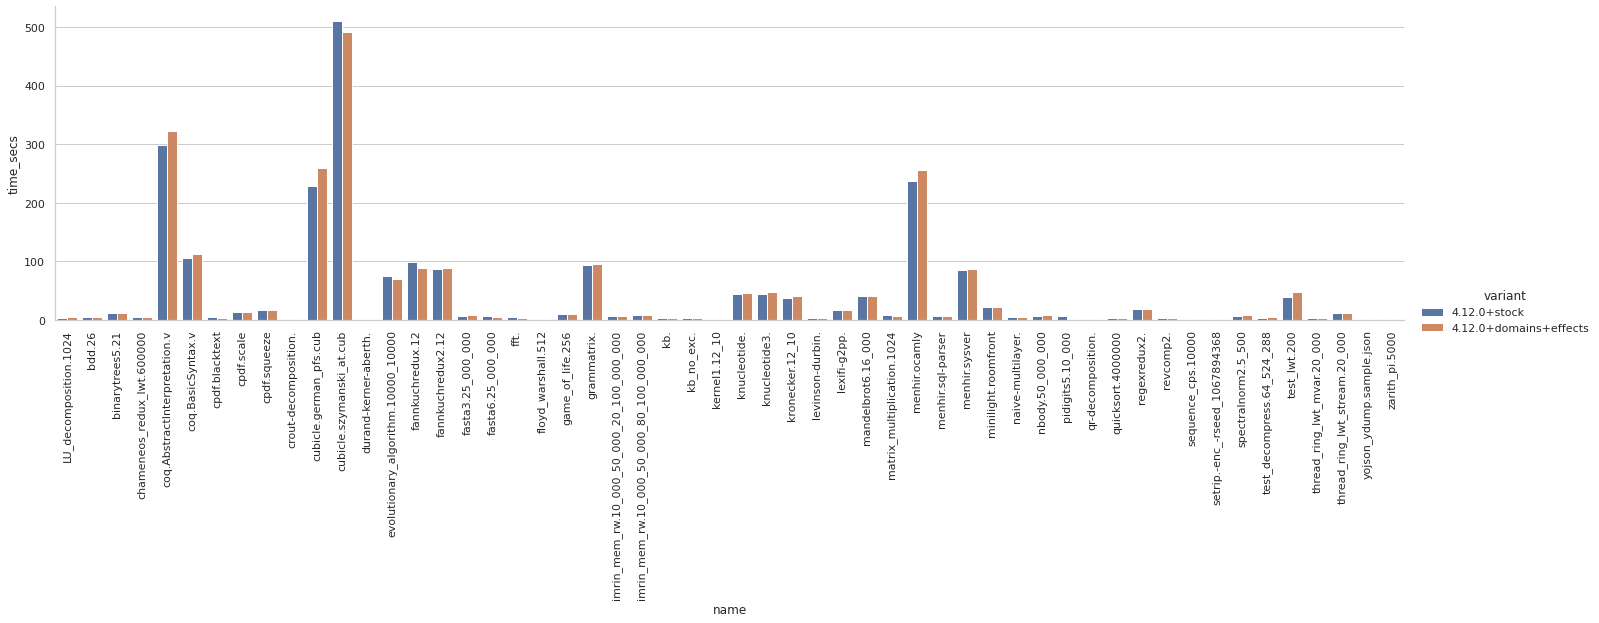

In [218]:
g = sns.catplot (x='name', y='time_secs', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalized

In [219]:
# returns a dictionary with {key = name : value : metric}
# the metric corresponds to the variant
def create_column(df, variant, metric):
    df = pd.DataFrame.copy(df)
#     print(df['variant'])
    variant_metric_name = list([ zip(df[metric], df[x], df['name'])
            for x in df.columns.array if x == "variant" ][0])
    name_metric = {n:t for (t, v, n) in variant_metric_name if v == variant}
#     print(name_metric)
    return name_metric

def add_display_name(df,variant, metric):
    name_metric = create_column(pd.DataFrame.copy(df), variant, metric)
#     print(name_metric)
    disp_name = [name+" ("+str(round(name_metric[name], 2))+")" for name in df["name"]]
    df["display_name"] = pd.Series(disp_name, index=df.index)
#     print(df)
    return df

def normalise(df,variant,topic,additionalTopics=[]):
    df = add_display_name(df,variant,topic)
    df = df.sort_values(["name","variant"])
#     print(df)
    grouped = df.filter(items=['name',topic,'variant','display_name']+additionalTopics).groupby('variant')
    ndata_frames = []
    for group in grouped:
#         print(group)
        (v,data) = group
        print(len(data[topic]))
        if(v != variant):
            data['b'+topic] = grouped.get_group(variant)[topic].values
            data[['n'+topic]] = data[[topic]].div(grouped.get_group(variant)[topic].values, axis=0)
            for t in additionalTopics:
#                 print(variant, t)
                data[[t]] = grouped.get_group(variant)[t].values
            ndata_frames.append(data)
    df = pd.concat (ndata_frames)
    return df

def plot_normalised(df,variant,topic):
    df = pd.DataFrame.copy(df)
    df.sort_values(by=[topic],inplace=True)
    df[topic] = df[topic] - 1
    g = sns.catplot (x="display_name", y=topic, hue='variant', data = df, kind ='bar', aspect=4, bottom=1)
    g.set_xticklabels(rotation=90)
    g.ax.legend(loc=8)
    g._legend.remove()
    g.ax.set_xlabel("Benchmarks")
    return g
    # g.ax.set_yscale('log')

<ipython-input-219-7b4ba1e98779>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


54
54


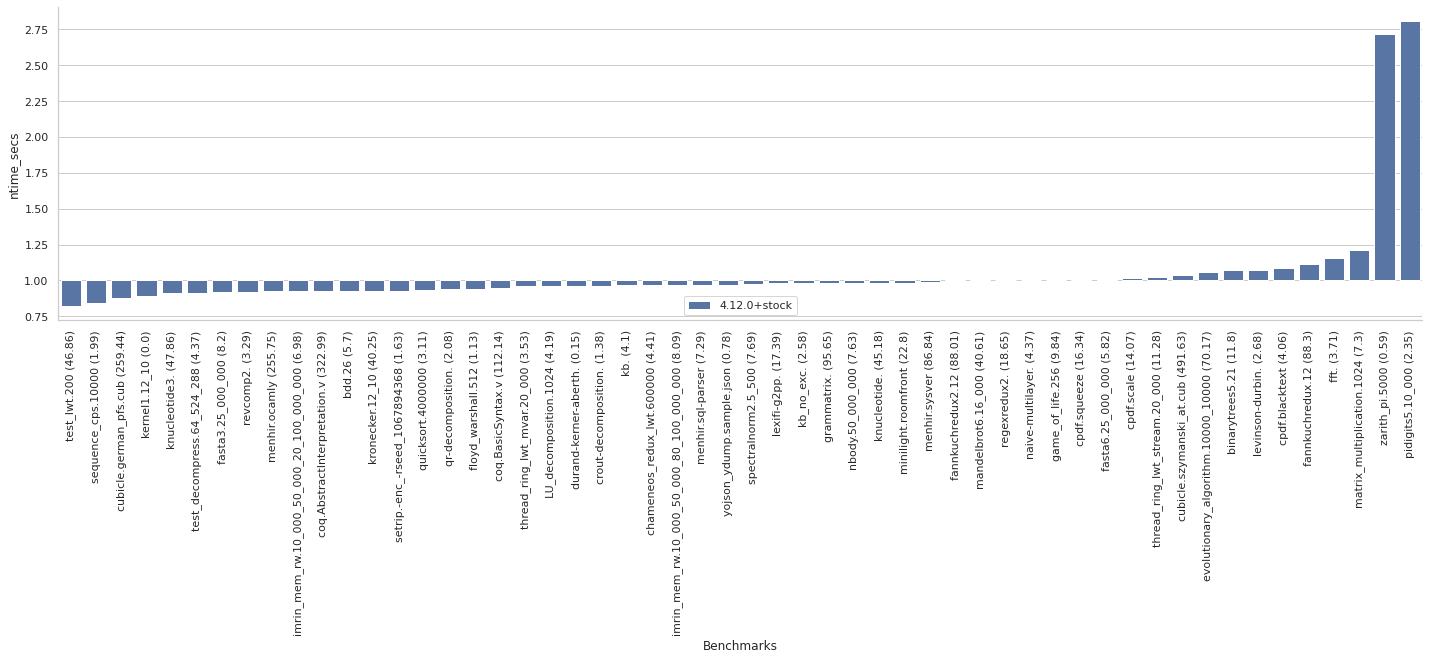

In [221]:
# print(df)
ndf = normalise(df, selected_baseline,'time_secs')
plot_normalised(ndf, selected_baseline,'ntime_secs')